In [334]:
import pandas as pd

df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [335]:
age_by_sex = df.groupby(['Sex','Pclass','Embarked'])['Age'].mean().reset_index()

age_by_sex = age_by_sex.rename(columns={'Age': 'Mean_Age'})

df = df.merge(age_by_sex)

df['Age'] = df['Age'].fillna(df['Mean_Age'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
 12  Mean_Age     889 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.4+ KB


In [336]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

df['Age_decade'] = df['Age'] - df['Age'] % 10
df['Family_size'] = df['SibSp'] + df['Parch'] + 1
df['Fare'] = df['Fare'] - df['Fare'] % 10

df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})
df['Embarked'].unique()
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 3})

df['Title'] = df['Name'].str.extract(r'(\,[^\.]+)')
df['Title'] = df['Title'].str.replace(', ', '', regex=True)


def title_mapper(x):
    if x in ['Capt', 'Col', 'Major', 'Dr', 'Rev']:
        return 'Professional'
    elif x in ['Don', 'Sir', 'Lord', 'Jonkheer', 'Lady', 'the Countess']:
        return 'Noble'
    elif x in ['Ms', 'Mme']:
        return 'Mrs'
    elif x in ['Mlle']:
        return 'Miss'
    else:
        return x

df['Title'] = df['Title'].map(title_mapper)

#print(df.groupby(df['Title'])['Title'].count())

df['Title'] = lb.fit_transform(df['Title'])

df['Traveling_Alone'] = df['Family_size'].map({1:1}).fillna(0)

def family_size_mapper(x):
    if x < 3:
        return 0
    elif x >= 3 and x <= 4:
        return 1
    elif x >= 5 and x <= 6:
        return 2
    elif x >= 7 and x <= 8:
        return 3
    else:
        return 4
    
df['Family_size'] = df['Family_size'].map(family_size_mapper)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Mean_Age,Age_decade,Family_size,Title,Traveling_Alone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,0.0,NaN,0,26.574766,20.0,0,2,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,70.0,C85,1,36.052632,30.0,0,3,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,0.0,NaN,0,23.223684,20.0,0,1,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,50.0,C123,0,32.704545,30.0,0,3,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,0.0,NaN,0,26.574766,30.0,0,2,1.0


In [337]:
ddf = df.drop(columns=['PassengerId', 'Name','Mean_Age', 'Cabin', 'Ticket', 'Traveling_Alone', 'Embarked', 'Parch', 'SibSp','Age_decade'])

ddf.head()

,Survived,Pclass,Sex,Age,Fare,Family_size,Title
0,0,3,1,22.0,0.0,0,2
1,1,1,0,38.0,70.0,0,3
2,1,3,0,26.0,0.0,0,1
3,1,1,0,35.0,50.0,0,3
4,0,3,1,35.0,0.0,0,2


In [338]:
X = df[['Pclass', 'Sex', 'Fare', 'Age', 'Title']]
y = df['Survived']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
( cnf_matrix[0][0] + cnf_matrix[1][1] ) / (cnf_matrix[0][1]+cnf_matrix[0][0]+cnf_matrix[1][1]+cnf_matrix[1][0])

( cnf_matrix[0][0]) / (cnf_matrix[0][1]+cnf_matrix[0][0])



np.float64(0.8650793650793651)

In [339]:
from sklearn.metrics import classification_report

target_names = ['Not survived', 'Survived']

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

Not survived       0.79      0.87      0.83       126
    Survived       0.80      0.70      0.75        97

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.79       223
weighted avg       0.79      0.79      0.79       223



Accuracy: 0.7937219730941704


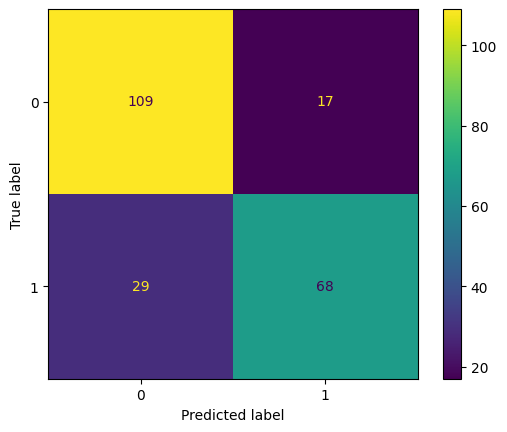

In [340]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [341]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

Accuracy: 0.8251121076233184


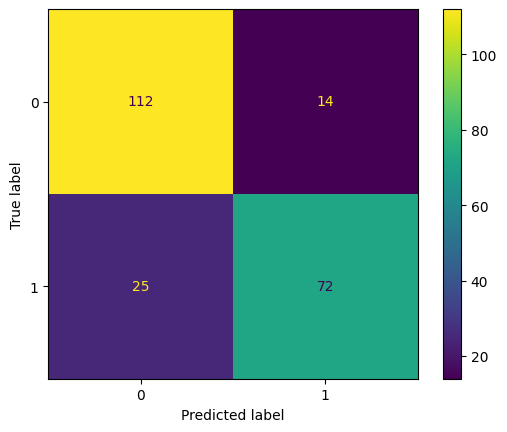

In [342]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [343]:
param_dist = {'n_estimators': randint(672,673),
              'max_depth': randint(27,28),
              'min_samples_split': randint(8, 9),
              'min_samples_leaf': randint(3, 4)}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf,
                                 param_distributions=param_dist,
                                 n_iter=5,
                                 cv=5,
                                 random_state=42)

rand_search.fit(X_train, y_train)

best_rf = rand_search.best_estimator_

print("Best hyperparameters: {'max_depth': 28, 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 673}")
print('Best hyperparameters:', rand_search.best_params_)

Best hyperparameters: {'max_depth': 28, 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 673}
Best hyperparameters: {'max_depth': 27, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 672}


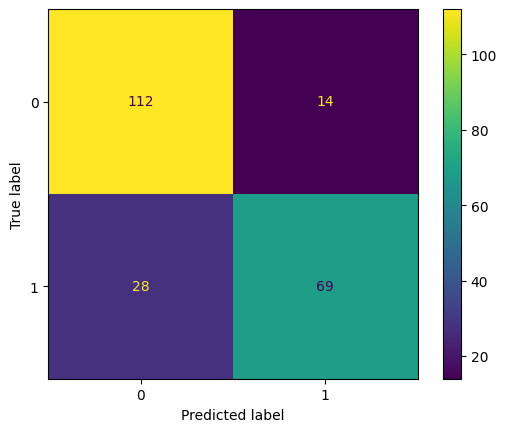

In [344]:
y_pred = best_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [345]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('accuracy:', accuracy)
print('precision:', precision)
print('recall:', recall)

from sklearn.metrics import classification_report

target_names = ['Not survived', 'Survived']

print(classification_report(y_test, y_pred, target_names=target_names))

accuracy: 0.8116591928251121
precision: 0.8313253012048193
recall: 0.711340206185567
              precision    recall  f1-score   support

Not survived       0.80      0.89      0.84       126
    Survived       0.83      0.71      0.77        97

    accuracy                           0.81       223
   macro avg       0.82      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



In [ ]:
feature_importance = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_importance.plot.bar()

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<function matplotlib.pyplot.show(close=None, block=None)>

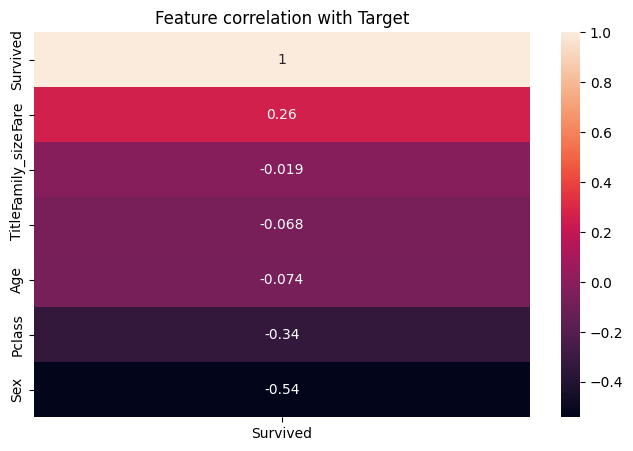

In [347]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = ddf.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix[['Survived']].sort_values(by='Survived', ascending=False), annot=True)

plt.title('Feature correlation with Target')
plt.show

In [348]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE

X, y = make_classification(n_samples=100, n_features=20, n_informative=10, random_state=42)

model = RandomForestClassifier()

rfe = RFE(estimator=model, n_features_to_select=5)

rfe.fit(X_train,y_train)

selected_features = rfe.support_

print('Selected Features:', X_train.columns)
print('Selected Features:', selected_features)

Selected Features: Index(['Pclass', 'Sex', 'Fare', 'Age', 'Title'], dtype='object')
Selected Features: [ True  True  True  True  True]


55     1
616    0
659    1
515    1
245    0
      ..
46     0
522    1
841    0
362    0
319    0
Name: Survived, Length: 223, dtype: int64